In [3]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [4]:
mainpath = "/Users/soldash/Documents/Tesis/python/Datos/Todas/" #ruta de Carga de los datos
filename = "dataframe_concatenado.csv" #Nombre del archivo a cargar

In [5]:
data = pd.read_csv(mainpath+filename, sep=",")
dummy_df = pd.get_dummies(data, columns=['Seizure'])
dummy_df

,ECG,Time,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF_HF,Seizure_0,Seizure_1,Seizure_2
0,-29.83,2022-07-01 13:25:21.280,680,148.360312,91,1.476621,23,53.488372,3341.061704,5328.681774,28221.219083,1.594907,0,0,1
1,-111.04,2022-07-01 13:25:10.500,664,194.773965,90,1.206969,23,57.500000,1405.554118,1806.423996,7091.854690,1.285204,0,0,1
2,-95.33,2022-07-01 13:25:16.140,832,184.431592,90,1.531681,22,52.380952,2312.004702,4062.403791,20176.263778,1.757091,0,0,1
3,250.32,2022-07-01 13:25:07.140,656,197.497749,89,1.136568,26,65.000000,784.287901,1629.490612,4862.066247,2.077669,0,0,1
4,155.67,2022-07-01 13:25:21.020,680,148.360312,91,1.496815,23,53.488372,3224.521574,5171.380043,27419.724444,1.603767,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55465,21.31,2022-07-02 02:17:01.250,1065,0.000000,53,0.000000,0,0.000000,4952.636478,21698.600327,182813.669515,4.381222,1,0,0
55466,189.18,2022-07-02 02:16:55.150,975,0.000000,53,0.000000,0,0.000000,4752.324507,19376.395447,180128.880924,4.077246,1,0,0
55467,-370.90,2022-07-02 02:16:51.100,965,251.857703,52,0.000000,8,42.105263,4648.755726,18230.284268,163606.994916,3.921541,1,0,0
55468,-9.60,2022-07-02 02:16:18.300,990,391.396444,56,1.295545,7,41.176471,8546.464800,10778.759849,81108.182128,1.261195,1,0,0


Tamaño de muestras preictales :18500


(array([18500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

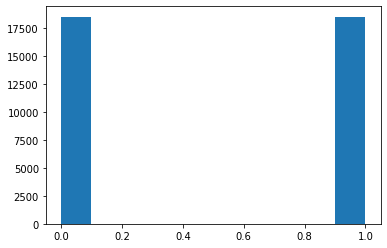

In [6]:
#Igualar muestras
sample_size = dummy_df[dummy_df["Seizure_1"] == 1].shape[0]
print("Tamaño de muestras preictales :"+ str(sample_size))

preictal = dummy_df[dummy_df["Seizure_1"] == 1]
other = dummy_df[dummy_df["Seizure_1"] == 0]

preictal_data = preictal.sample(n= sample_size)
other_data = other.sample(n= sample_size)
    
Sample = pd.concat([preictal_data, other_data], axis = 0)

plt.hist(Sample["Seizure_1"])

In [8]:
# Importando las bibliotecas necesarias
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = Sample[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF_HF']]
y = Sample['Seizure_1']

# Definir cuadrícula de parámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],  # Valores más específicos
    'min_samples_split': [10, 20, 50, 100],  # Mínimo de 10 muestras para considerar una división
    'min_samples_leaf': [5, 10, 20, 40]  # Mínimo de 5 muestras en una hoja
}

# Dividiendo los datos en conjuntos de entrenamiento y prueba
# Esto es útil para evaluar cómo se desempeñará tu modelo en datos no vistos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Búsqueda en cuadrícula
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Usar el mejor modelo para predecir
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

# Evaluación del rendimiento del modelo
print("Mejor Estimador:", best_tree)
print("Precisión:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Mejor Estimador: DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10)
Precisión: 0.9847027027027027
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9256
           1       0.99      0.98      0.98      9244

    accuracy                           0.98     18500
   macro avg       0.98      0.98      0.98     18500
weighted avg       0.98      0.98      0.98     18500



Vamos a descomponer los resultados has obtenido:

1. **Mejor Estimador**:
   - `DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=5, min_samples_split=10)`
   
   Esto describe el modelo de árbol de decisión que mejor se desempeñó durante el proceso de ajuste de hiperparámetros. Las características del modelo son:
   
   - **criterion**: 'entropy' - Esta es la métrica que el árbol utilizó para tomar decisiones sobre cómo dividir los datos. La entropía es una métrica que mide el desorden o la impureza de un conjunto de datos.
   - **max_depth**: 40 - Profundidad máxima del árbol. Un árbol con una profundidad de 40 podría considerarse bastante profundo, aunque esto puede ser necesario para modelos complejos.
   - **min_samples_leaf**: 5 - El número mínimo de muestras requeridas para ser una hoja. Esto ayuda a prevenir el sobreajuste, asegurando que al menos 5 muestras estén en un nodo hoja.
   - **min_samples_split**: 10 - El número mínimo de muestras requeridas para dividir un nodo interno.

2. **Precisión**: 
   - `0.9638492871690427` 
   
   La precisión global del modelo en el conjunto de prueba es aproximadamente del 96.38%. Es una métrica bastante alta, lo que sugiere que el modelo tiene un buen rendimiento.

3. **Reporte de clasificación**: 
   - Para la clase 0 (no preictales):
     - **Precisión**: 0.97 - De todas las predicciones que el modelo hizo como clase 0, el 97% fueron correctas.
     - **Recall (Sensibilidad)**: 0.96 - De todos los verdaderos valores de clase 0 en el conjunto de prueba, el modelo predijo correctamente el 96%.
     - **f1-score**: 0.96 - Es una métrica que combina precisión y recall en una única métrica. Cuanto más cerca de 1, mejor.
   
   - Para la clase 1 (preictales):
     - **Precisión**: 0.96
     - **Recall**: 0.97
     - **f1-score**: 0.96

   Las métricas **macro avg** y **weighted avg** son promedios de las métricas para ambas clases. En este caso, tanto el promedio macro como el promedio ponderado para precisión, recall y f1-score son aproximadamente del 96%, lo que indica un rendimiento uniforme a través de ambas clases.

**Interpretación general**:

El modelo de árbol de decisión que has entrenado parece tener un rendimiento muy alto con una precisión de aproximadamente el 96.38%. Ambas clases, preictales y no preictales, son predichas con una precisión y recall muy altos, lo que indica que el modelo es capaz de identificar adecuadamente ambas condiciones. La elección de usar la entropía como criterio y los valores específicos para `max_depth`, `min_samples_leaf` y `min_samples_split` parecen haber sido adecuados para este conjunto de datos.

In [21]:
print("Número de características:", best_tree.n_features_)

Número de características: 10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Predice las etiquetas para el conjunto de entrenamiento
y_train_pred = best_tree.predict(X_train)

# Calcula y muestra el accuracy de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy de Entrenamiento: {train_accuracy}")


Accuracy de Entrenamiento: 0.9915675675675676


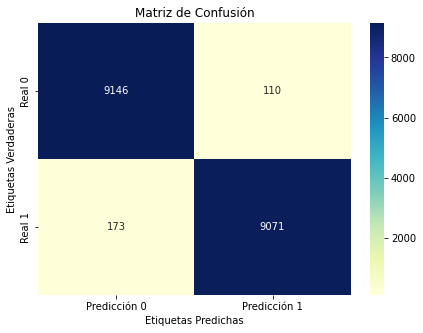

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Convertir la matriz de confusión a DataFrame para etiquetar fácilmente los ejes
cm_df = pd.DataFrame(cm, index=['Real 0', 'Real 1'], columns=['Predicción 0', 'Predicción 1'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu", fmt="g")  # fmt="g" para evitar notación científica
plt.title('Matriz de Confusión')
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()

In [11]:
model_name = "arbol"
model_path = 'saved_model/{}/00000001'.format(model_name)
best_tree.save(model_path)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'save'

In [12]:
from joblib import dump

# Guarda el modelo en un archivo
dump(best_tree, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [17]:
import boto3

s3 = boto3.resource('s3')
bucket_name = 'decisiontreee'
model_key = 'model/decision_tree_model.tar.gz'

s3.Bucket(bucket_name).upload_file('decision_tree_model.tar.gz', model_key)

In [23]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.sklearn.model import SKLearnModel

role = 'arn:aws:iam::027331693661:role/Modelv2'  # Obtiene el rol de ejecución de SageMaker

# Crea un modelo SageMaker
model = SKLearnModel(
    model_data='s3://{}/{}'.format(bucket_name, model_key),
    role=role,
    entry_point='inference_script.py',  # Necesitas escribir un script de inferencia
    framework_version='0.23-1'
)

# Desplegar el modelo
predictor = model.deploy(
    instance_type='ml.m5.large',
    initial_instance_count=1
)


----!